# Confidence regions of the bivariate $t$-distribution

In this notebook, we demonstrate the function `plot_confregion_bivariate_t` from `modules.plot_helpers` for plotting $\alpha \times 100\%$ confidence regions of a given bivariate $t$-distribution. No sampling is required to obtain these confidence regions. See the Appendix in our manuscript for the analytic derivation.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_t, invwishart
from modules.plot_helpers import plot_confregion_bivariate_t

Let's use some arbitrary bivariate $t$-distribution. Feel free to play with its parameters. We set the argument `validate=True`, so that `plot_confregion_bivariate_t` validates the obtained confidence ellipses. Validation dominates the overall runtime and is in production runs *not* required. In practice, we will set `validate=False`.

confidence ellipse at level '0.9888910034617577' validated.
confidence ellipse at level '0.8646647167633873' validated.
confidence ellipse at level '0.3934693402873666' validated.


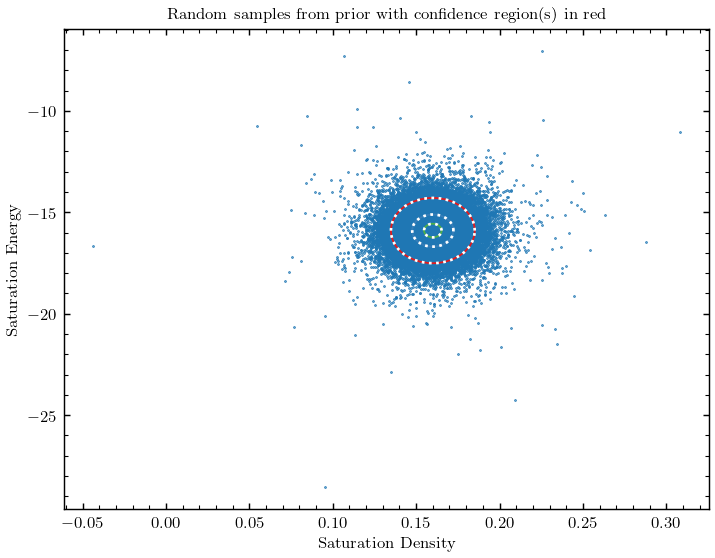

In [2]:
prior_params = {"mu": np.array([0.16, -15.9]),
                "Psi": np.array([[0.005**2, 0.0], [0.0, 0.32**2]]),
                "kappa": 1, "nu": 5}
fig, ax = plt.subplots(1,1)
plot_confregion_bivariate_t(ax=ax, mu=prior_params["mu"], 
                            Sigma=prior_params["Psi"], nu=prior_params["nu"], 
                            alpha=list(range(1,4)), alpha_unit="normal_std", num_pts=1000000, 
                            plot_scatter=True, validate=True)
ax.set_title("Random samples from prior with confidence region(s) in red")
ax.set_xlabel("Saturation Density")
ax.set_ylabel("Saturation Energy")
plt.savefig("confidence_region_test1.png")

Next, let's apply (and validate) the same function for a random symmetric, pos. def. matrix drawn from the Inverse Wishart distribution.

False True
3.552713678800501e-14 1e-10 [0.002109   0.12633528 0.59753066] 0.001


TypeError: unsupported format string passed to numpy.ndarray.__format__

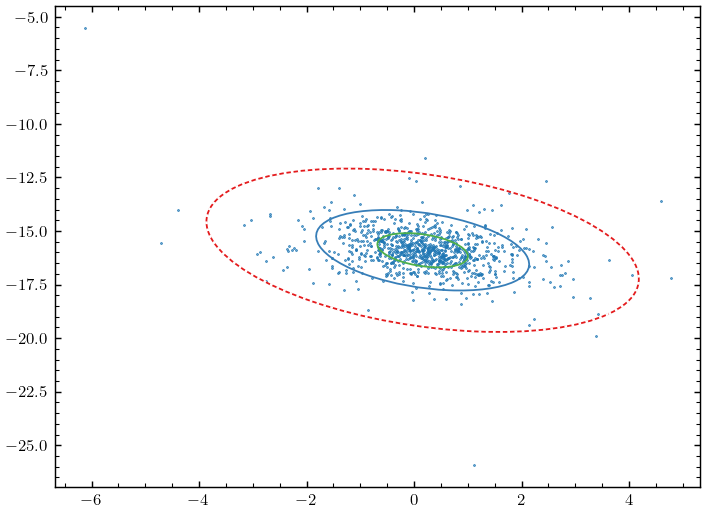

In [3]:
mat = invwishart.rvs(4,np.eye(2)*3)
fig, ax = plt.subplots(1,1)
plot_confregion_bivariate_t(ax=ax, mu=prior_params["mu"], Sigma=mat, 
                            nu=prior_params["nu"], 
                            alpha=list(range(1,4)), alpha_unit="normal_std", num_pts=1000, 
                            plot_scatter=True, validate=True)
ax.set_title("Random sym. pos. def. matrix with (red) confidence regions")
fig.savefig("prior_satpoint_conf_regions_test2.png")

# Confidence regions of the bivariate Normal distribution

In [5]:
from scipy.stats import multivariate_normal
from modules.plot_helpers import confidence_ellipse
import seaborn as sns

In [6]:
sx = 0.01
sy = 0.05
rho=0.75
mu=[1,2]
offdiag = sx*sy*rho
Sigma=[[sx**2,offdiag],[offdiag,sy**2]]
data = multivariate_normal.rvs(mean=mu, cov=Sigma, size=10000)

<AxesSubplot: >

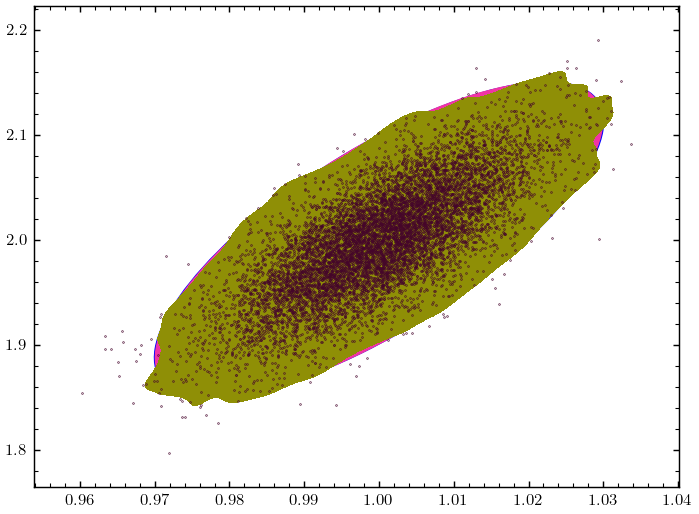

In [7]:
n_std=3
fig, ax = plt.subplots(1,1)
# determine confidence ellipse analytically
plot_confregion_bivariate_t(ax=ax, mu=mu, Sigma=Sigma, 
                            nu=10000, 
                            alpha=n_std, alpha_unit="normal_std", num_pts=100000, 
                            plot_scatter=False, validate=False, edgecolor="b")

# estimate confidence ellipse
confidence_ellipse(ax=ax, x=data[:,0], y=data[:,1], n_std=n_std, show_scatter=True, facecolor='#F034A3')

# use KDE to estimate confidence ellipse
levels = [np.exp(-n_std**2 / 2), 1.]
sns.kdeplot(ax=ax, x=data[:, 0], y=data[:, 1],
            fill=True, levels=levels,
            label=f"",
            legend=False,
            color="y")
#ax.set_xlim(-4,4)
#ax.set_xlim(-4,4)

# Testing marginal distributions of the bivariate $t$ distribution

This notebook tests Frederi's derivation of the marginal distributions of the bivariate $t$ distribution, which is a univariate Student-$t$ distribution.

In [ ]:
import numpy as np
from scipy.stats import multivariate_t

In [ ]:
df=5
sig1 = 2
sig2 = 3
offdiag = sig1*sig2*0.9
scale=np.array([[sig1**2,offdiag],[offdiag,sig2**2]])
loc=np.array([3,4])
data = multivariate_t.rvs(df=df, shape=scale, loc=loc, size=100000000)

In [ ]:
ind = 0
data_mar = data[:, ind]
print("mu", data_mar.mean())
print("var", np.var(data_mar))

mu 3.0001746742792625
var 6.668863582163601


In [ ]:
sigma_i2 = scale[ind, ind]

In [ ]:
var = df/(df-2) * sigma_i2
var

6.666666666666667

-6.440544787544638e-08

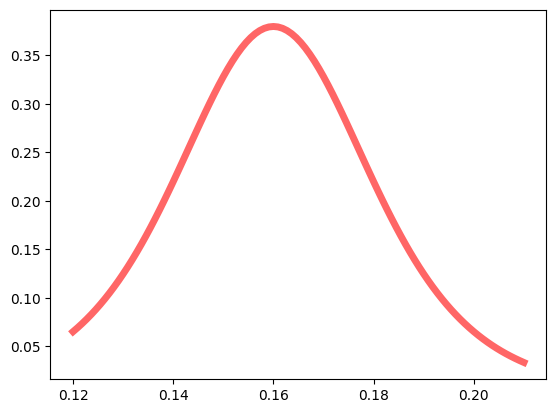

In [ ]:
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
grid = np.linspace(0.12, 0.21, 100)
fig, ax = plt.subplots(1,1)

sigma = 0.02
df=5
loc=0.16
y = t.pdf(grid, df=df, loc=loc, scale=sigma)
ax.plot(grid, y*sigma, 'r-', lw=5, alpha=0.6, label='t pdf')
samples = t.rvs(size=100000000, df=df, loc=loc, scale=sigma)
np.var(samples) * (df-2)/df - sigma**2